### Getting the data

In [3]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../data"):
    # Return CSV file path given ticker symbol.
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    # Read stock data (adjusted close) for given symbols from CSV files.
    stock_df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', parse_dates = True,
        usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        stock_df = stock_df.join(df_temp)
        if symbol == 'SPY':
            stock_df = stock_df.dropna(subset=['SPY'])
    return stock_df

### Plotting the data

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_data(df, title = 'Stock Prices'):
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()    

### Compute daily returns

In [34]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[ : -1].values) - 1 
    daily_returns.ix[0, : ] = 0 # Set daily returns for row 0 to 0
    return daily_returns

### Read the data

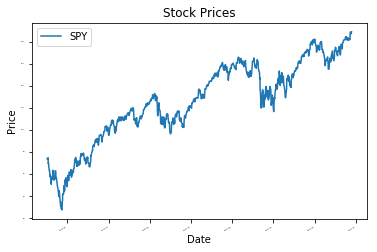

In [35]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
plot_data(df)

### Compute daily returns

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


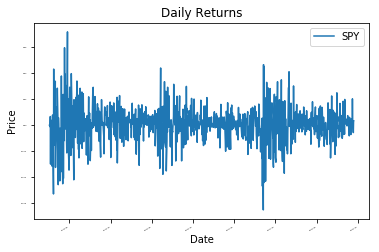

In [36]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = 'Daily Returns')

### Plot a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111189dd8>]],
      dtype=object)

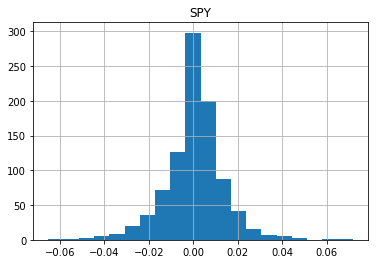

In [37]:
daily_returns.hist(bins = 20)

### Calculate mean and std

In [43]:
mean = daily_returns.mean()
print('mean = ',  mean)
std = daily_returns.std()
print('std = ', std)

mean =  SPY    0.000636
dtype: float64
std =  SPY    0.01337
dtype: float64


### Plot mean and std

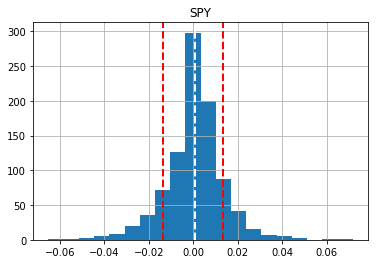

In [56]:
daily_returns.hist(bins = 20)
plt.axvline(mean[0], color = 'w', linestyle='dashed', linewidth = 2)
plt.axvline(std[0], color = 'r', linestyle='dashed', linewidth = 2)
plt.axvline(-std[0], color = 'r', linestyle='dashed', linewidth = 2)
plt.show()

### Compute kurtosis

In [57]:
print(daily_returns.kurtosis())

SPY    3.220278
dtype: float64


### Plot two histograms together (prepration)

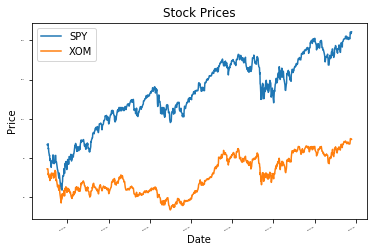

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


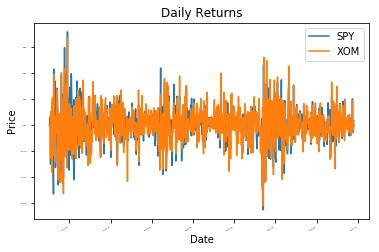

In [61]:
# Read data
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = 'Daily Returns')

### Plot two histograms together

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1110d0390>,
      dtype=object)

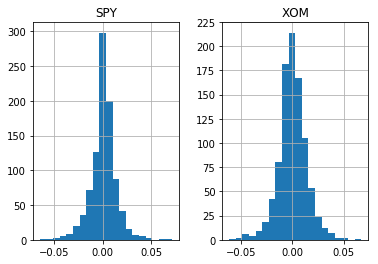

In [64]:
# Plot histogram directly from dataframe
daily_returns.hist(bins = 20)

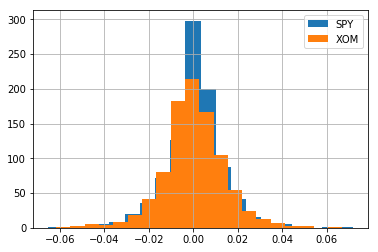

In [66]:
# Compute and plot both histograms on the same chart
daily_returns['SPY'].hist(bins = 20, label = 'SPY')
daily_returns['XOM'].hist(bins = 20, label = 'XOM')
plt.legend(loc = 'upper right')
plt.show()

### Scatter plots (preperation)

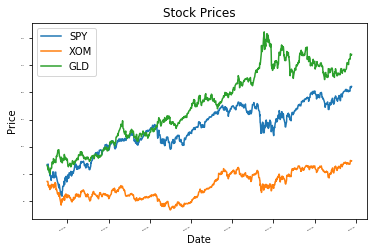

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


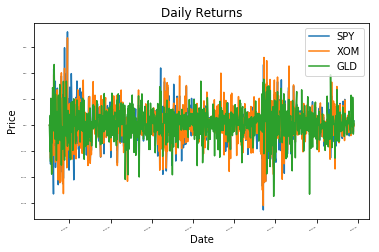

In [67]:
# Read data
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = 'Daily Returns')

### Scatter plot SPY vs XOM

beta_XOM=  0.8507462236725954
alpha_XOM =  -0.00024686727668009177


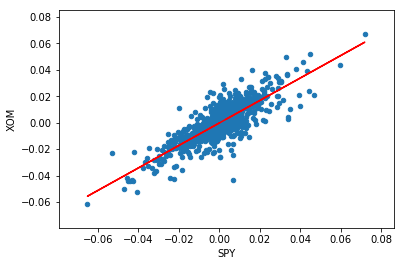

In [79]:
import numpy as np
daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'XOM')
beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
print('beta_XOM= ', beta_XOM)
print('alpha_XOM = ', alpha_XOM)
plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-', color = 'r')
plt.show()


### Scatter plot SPY vs GLD

beta_GLD =  0.05976113483222503
alpha_GLD =  0.0007478811161601734


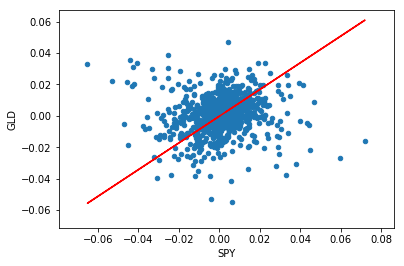

In [80]:
daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'GLD')
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
print('beta_GLD = ', beta_GLD)
print('alpha_GLD = ', alpha_GLD)
plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-', color = 'r')
plt.show()


### Calculate correlation coefficient

In [81]:
daily_returns.corr(method = 'pearson')

,SPY,XOM,GLD
SPY,1.000000,0.820241,0.067324
XOM,0.820241,1.000000,0.069687
GLD,0.067324,0.069687,1.000000
